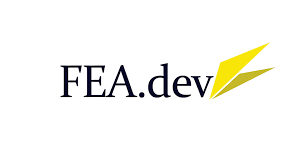

# <font color=white|cyan>Projeto FEA.dev</font> 

### A distribuição da Rede de Telefonia Móvel tem relação com a distribuição de Internet Banda Larga?

Tentarei responder a essa pergunta com a ajuda de uma Análise de Regressão e Correlação.

In [33]:
# Importando as bibliotecas que vou usar:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

# Nomeando os dados sobre a Telefonia Móvel:
Telefonia_Móvel = pd.read_csv('Documents/modalidade.csv')

# Nomeando os dados sobre a Internet Banda Larga:
Internet_Banda_Larga = pd.read_csv('Documents/microdados.csv')

In [34]:
# Printando o conjunto de dados sobre a Telefonia Móvel:

print(Telefonia_Móvel)

          ano  mes sigla_uf  ddd            cnpj empresa porte_empresa  \
0        2005    2       SP   11   2558157000162    VIVO  Grande Porte   
1        2005    2       SP   11   2558157000162    VIVO  Grande Porte   
2        2005    2       SP   11   4206050000180     TIM  Grande Porte   
3        2005    2       SP   11   4206050000180     TIM  Grande Porte   
4        2005    2       SP   11  40432544000147   CLARO  Grande Porte   
...       ...  ...      ...  ...             ...     ...           ...   
6226546  2021    1       PA   94   5423963000111      OI  Grande Porte   
6226547  2021    1       PA   94   5423963000111      OI  Grande Porte   
6226548  2021    1       PA   94   5423963000111      OI  Grande Porte   
6226549  2021    1       PA   94   5423963000111      OI  Grande Porte   
6226550  2021    1       PA   94   5423963000111     NaN           NaN   

        modalidade    acessos  
0         Pré-pago  4362642.0  
1         Pós-pago  1016008.0  
2         Pré-p

In [35]:
# Está muito bagunçado, vou arrumar e deixar somente o que é necessário.
# Primeiro vou excluir as colunas que não vou precisar.

Telefonia_Móvel.drop('mes', axis = 1, inplace=True)
Telefonia_Móvel.drop('ddd', axis = 1, inplace=True)
Telefonia_Móvel.drop('cnpj', axis = 1, inplace=True)
Telefonia_Móvel.drop('porte_empresa', axis = 1, inplace=True)
Telefonia_Móvel.drop('modalidade', axis = 1, inplace=True)
Telefonia_Móvel.drop('empresa', axis = 1, inplace=True)

Telefonia_Móvel.head()

,ano,sigla_uf,acessos
0,2005,SP,4362642.0
1,2005,SP,1016008.0
2,2005,SP,1770510.0
3,2005,SP,385276.0
4,2005,SP,1863716.0


In [38]:
# Já está bem mais bonito, mas ainda tem coisas que não preciso. Vou fazer um filtro e deixar somente os dados do ano de 2021

filtro  = Telefonia_Móvel['ano'] > 2020
Telefonia_Móvel2 = Telefonia_Móvel[filtro]

Telefonia_Móvel2.head(6071875) # Também é possível usar display(Telefonia_Móvel2) para printar o DataFrame completo.

,ano,sigla_uf,acessos
6071871,2021,AC,765.0
6071872,2021,AC,1.0
6071873,2021,AC,183.0
6071874,2021,AC,1.0
6071875,2021,AC,1.0
...,...,...,...
6226546,2021,PA,1.0
6226547,2021,PA,4.0
6226548,2021,PA,4.0
6226549,2021,PA,32.0


In [39]:
# Agora, vamos agrupar por estado.

Telefonia_Móvel2.groupby(['sigla_uf']).agg({'ano':'mean','acessos':'sum'})

,ano,acessos
sigla_uf,,
AC,2021,785378.0
AL,2021,2914576.0
AM,2021,4072723.0
AP,2021,761623.0
BA,2021,13870095.0
CE,2021,8937540.0
DF,2021,4109379.0
ES,2021,4228775.0
GO,2021,7327127.0


#### Agora vou fazer a mesma coisa com os dados sobre a Internet Banda Larga

In [40]:
# Primeiro vou printar para vermos como os dados estão.

print(Internet_Banda_Larga)

           ano  mes sigla_uf  id_municipio            cnpj empresa  \
0         2007    3       AC       1200013  33530486000129   CLARO   
1         2007    3       AC       1200013  76535764000143      OI   
2         2007    3       AC       1200013  76535764000143      OI   
3         2007    3       AC       1200013  76535764000143      OI   
4         2007    3       AC       1200013  76535764000143      OI   
...        ...  ...      ...           ...             ...     ...   
15044937  2021    7       TO       1722107  76535764000143      OI   
15044938  2021    7       TO       1722107  76535764000143      OI   
15044939  2021    7       TO       1722107  76535764000143      OI   
15044940  2021    7       TO       1722107  76535764000143      OI   
15044941  2021    7       TO       1722107  76535764000143      OI   

         porte_empresa tecnologia    transmissao        velocidade  acessos  
0         Grande Porte       xDSL  Cabo Metálico    0Kbps a 64Kbps        1  
1  

In [41]:
# Vou excluir as colunas que não vou precisar.

Internet_Banda_Larga.drop('mes', axis = 1, inplace=True)
Internet_Banda_Larga.drop('id_municipio', axis = 1, inplace=True)
Internet_Banda_Larga.drop('cnpj', axis = 1, inplace=True)
Internet_Banda_Larga.drop('empresa', axis = 1, inplace=True)
Internet_Banda_Larga.drop('porte_empresa', axis = 1, inplace=True)
Internet_Banda_Larga.drop('tecnologia', axis = 1, inplace=True)
Internet_Banda_Larga.drop('transmissao', axis = 1, inplace=True)
Internet_Banda_Larga.drop('velocidade', axis = 1, inplace=True)

# Vou fazer um filtro e deixar somente os dados do ano de 2021

filtro  = Internet_Banda_Larga['ano'] > 2020
Internet_Banda_Larga2 = Internet_Banda_Larga[filtro]

# Agora, vou agrupar por estado.

Internet_Banda_Larga2.groupby(['sigla_uf']).agg({'ano':'mean','acessos':'sum'})

,ano,acessos
sigla_uf,,
AC,2021,647417
AL,2021,1467641
AM,2021,2923442
AP,2021,753165
BA,2021,9578078
CE,2021,8783633
DF,2021,5543482
ES,2021,4700455
GO,2021,8093542


#### Agora que já vimos os dados individualmente, vamos partir para a Análise de Regressão e Correlação.

In [42]:
# Como os dados tem extensões diferentes, vou criar listas com os acessos dos estados que se reperem nos dois conjuntos de dados.

Dados_Telefonia_Móvel_e_Internet_Banda_Larga = {
    'Telefonia': [785378, 2914576, 4072723, 761623, 13870095, 8937540, 4109379, 4228775, 7327127, 5615096, 22737880, 2910661, 3770754, 5987497],
    'Internet': [647417, 1467641, 2923442, 753165, 9578078, 8783633, 5543482, 4700455, 8093542, 2844304, 28395836, 3176102, 3876885, 3953197]}

In [43]:
# Agora vou criar um DataFrame com os dados das listas.

Dados_Telefonia_Móvel_e_Internet_Banda_Larga = pd.DataFrame(Dados_Telefonia_Móvel_e_Internet_Banda_Larga)
Dados_Telefonia_Móvel_e_Internet_Banda_Larga.head()

,Telefonia,Internet
0,785378,647417
1,2914576,1467641
2,4072723,2923442
3,761623,753165
4,13870095,9578078


In [44]:
# Vou fazer uma análise geral dos dados:

Dados_Telefonia_Móvel_e_Internet_Banda_Larga.describe()

,Telefonia,Internet
count,1.400000e+01,1.400000e+01
mean,6.287793e+06,6.052656e+06
std,5.821489e+06,7.022945e+06
min,7.616230e+05,6.474170e+05
25%,3.128620e+06,2.864088e+06
50%,4.169077e+06,3.915041e+06
75%,6.992220e+06,7.456027e+06
max,2.273788e+07,2.839584e+07


Analisando os dados acima, pôde-se dizer, por exemplo, que temos um conjunto de dados assimétricos (a média (mean) não é semelhante à mediana (50%)). Isso nos dá indícios de que os acessos de telefonia e internet não estão distribuídos de maneira semelhante nos estados analisados.

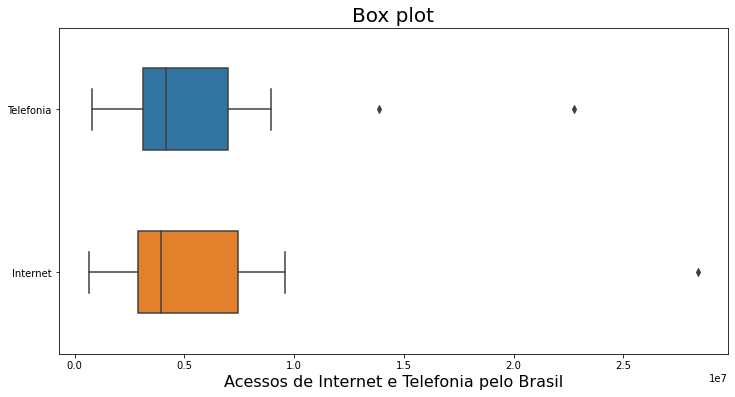

In [45]:
# Vou fazer um Box Plot para ver como é a distribuição dos acessos

ax = sns.boxplot(data=Dados_Telefonia_Móvel_e_Internet_Banda_Larga, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('Acessos de Internet e Telefonia pelo Brasil', fontsize=16)
ax

Observando o Box Plot acima, podemos perceber que não há grandes discrepâncias entre os acessos de internet e telefonia.

In [47]:
# Por fim, vou usar a função .corr() para ver qual é a relação entre os acessos de Telefonia e Internet:

Correlação = Dados_Telefonia_Móvel_e_Internet_Banda_Larga.corr()

Correlação.head()

,Telefonia,Internet
Telefonia,1.000000,0.953795
Internet,0.953795,1.000000


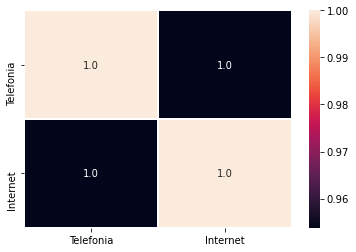

In [48]:
plot = sns.heatmap(Correlação, annot = True, fmt=".1f", linewidths=.6)
plot

Depois de analisar a regressão acima, podemos concluir que há correlação entre os acessos de Telefonia Móvel e de Internet e que essa correlação é positiva, ou seja, as variáveis analisada estão diretamente correlacionadas (onde tem telefonia móvel, tende a ter internet a banda larga). Mas, essa correlação é forte ou fraca?  

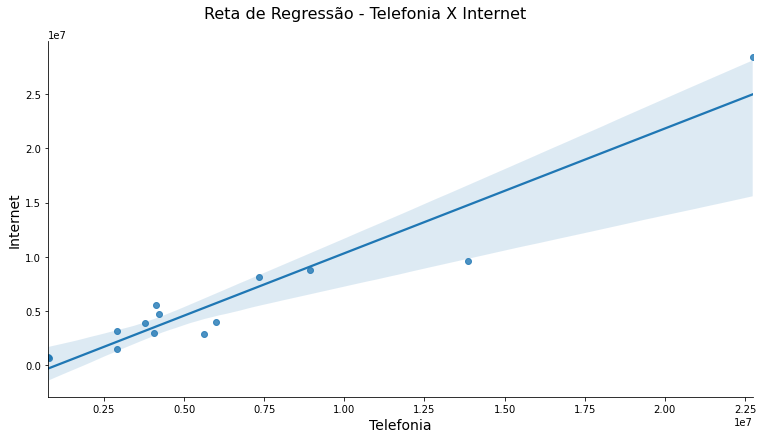

In [46]:
# Vou fazer a Reta de Regressão para ver se a correlação é forte ou fraca.

ax = sns.lmplot(x="Telefonia", y="Internet", data=Dados_Telefonia_Móvel_e_Internet_Banda_Larga)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Telefonia X Internet', fontsize=16, y=1.02)
ax.set_xlabels("Telefonia", fontsize=14)
ax.set_ylabels("Internet", fontsize=14)
ax

Analisando a reta de regressão acima, vimos que os pontos estão dispersos, logo a correlação entre as variáveis é fraca, ou seja, há correlação entre a internet e a telefonia em alguns lugares, mas não em todos. Não é porque tem telefonia que obrigatóriamente terá internet.

## <font color=white|cyan>**Conclusão:** </font>

Concluimos que há uma correlação entre a telefonia móvel e a rede de banda larga, mas essa correlação é fraca, não é em todos os lugares que terá os dois.